In [1]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from pandas import DataFrame, read_csv
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
import csv
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from datetime import date, timedelta
from sklearn.metrics import mean_squared_error


In [2]:
def unifyDate(date1):
    if "/" in date1:
        dates = date1.split("/")
        return dates[2]+"-"+dates[0]+"-"+dates[1];
    else:
        return date1;

In [6]:
Location = r'D:\UBINFO\Fall2019\CSE410\Project\Saved_CSV\AAPL_MACD_WOO.csv'
macd = pd.read_csv(Location)
macd_dates = macd['date'].to_numpy()
macd_hist = macd['MACD_Hist'].to_numpy()
macd_data = macd['MACD'].to_numpy()
macd_signal = macd['MACD_Signal'].to_numpy()
macd_woo = macd['WOO_ratings'].to_numpy()

for i in range(len(macd_dates)):
    macd_dates[i] = unifyDate(macd_dates[i]);

macd_dates

array(['1999-12-9', '1999-12-10', '1999-12-13', ..., '2019-10-17',
       '2019-10-18', '2019-10-21'], dtype=object)

In [7]:
Location = r'D:\UBINFO\Fall2019\CSE410\Project\Saved_CSV\AAPL_RSI.csv'
rsi = pd.read_csv(Location)
rsi_dates = rsi['date'].to_numpy()
rsi_data = rsi['RSI'].to_numpy()

rsi_dates

array(['1999-11-29', '1999-11-30', '1999-12-01', ..., '2019-11-04',
       '2019-11-05', '2019-11-06'], dtype=object)

In [14]:
Location = r'D:\UBINFO\Fall2019\CSE410\Project\Saved_CSV\Price.csv'
price = pd.read_csv(Location)
price_close = price['close'].to_numpy()
date_arr = price['date'].to_numpy()
date_arr2 = [];
for date2 in date_arr:
    date_arr2.append(unifyDate(date2));
date_arr2 = np.asarray(date_arr2)
date_arr2

array(['1999-11-1', '1999-11-2', '1999-11-3', ..., '2019-10-29',
       '2019-10-30', '2019-10-31'], dtype='<U10')

In [67]:
sma_200 = r'D:\UBINFO\Fall2019\CSE410\Project\Saved_CSV\SMA_200.csv'
sma_50 = r'D:\UBINFO\Fall2019\CSE410\Project\Saved_CSV\SMA_50.csv'

sma_200_data = pd.read_csv(sma_200).to_numpy()
sma_50_data = pd.read_csv(sma_50).to_numpy()
first_sma_200 = sma_200_data[0]
first_sma_50 = sma_50_data[0]

toAdd_200 = first_sma_200[1]/200
toAdd_50 = first_sma_50[1]/50 

sma_200 = toAdd_200   #day 1
sma_50 = toAdd_50

l = [None] * len(sma_200_data)

sma_woo = [None] * len(sma_200_data)
sma_dates =[None] * len(sma_200_data)

#filling the gap of first 200 days
for i in range(198):
    d = date_arr[i]
    #use real sma_50 data after day 50
    val = 0
    if i >= 50:
        val = sma_50_data[i-49][1]
    else:
        val = sma_50
    
    woo=0
    if price_close[i] > sma_50 and sma_50 > sma_200:
        woo = 1;
    elif  sma_50 > price_close[i] and price_close[i] > sma_200:
        woo = 2;
    elif  sma_50 > sma_200 and sma_200 > price_close[i]:
        woo = 3;
    elif  sma_200 > sma_50 and sma_50 > price_close[i]:
        woo = 4;
    elif  sma_200 > price_close[i] and price_close[i] > sma_50:
        woo = 5;
    elif  price_close[i] > sma_200 and sma_200 > sma_50:
        woo = 6;
    l[i] = [d, price_close[i], sma_200, sma_50, woo]
    sma_200 = sma_200 + toAdd_200
    sma_50 = sma_50 + toAdd_50
    sma_woo[i] = woo
    sma_dates[i] = d

#add real sma_200_day data into previous array
for i in range(199,len(sma_200_data)):
    d = date_arr[i]
    woo = 0
    if price_close[i] > sma_50_data[i-49][1] and sma_50_data[i-49][1] > sma_200_data[i-199][1]:
        woo = 1;
    elif  sma_50_data[i-49][1] > price_close[i] and price_close[i] > sma_200_data[i-199][1]:
        woo = 2;
    elif  sma_50_data[i-49][1] > sma_200_data[i-199][1] and sma_200_data[i-199][1] > price_close[i]:
        woo = 3;
    elif  sma_200_data[i-199][1] > sma_50_data[i-49][1] and sma_50_data[i-49][1] > price_close[i]:
        woo = 4;
    elif  sma_200_data[i-199][1] > price_close[i] and price_close[i] > sma_50_data[i-49][1]:
        woo = 5;
    elif  price_close[i] > sma_200_data[i-199][1] and sma_200_data[i-199][1] > sma_50_data[i-49][1]:
        woo = 6;
    l[i] = [d, price_close[i], sma_200_data[i-199][1], sma_50_data[i-49][1], woo]
    sma_woo[i] = woo
    sma_dates[i] = d
#l: date, closing price, sma_200, sma_50, woo rating
sma_woo = np.asarray(sma_woo)
sma_dates = np.asarray(sma_dates)
none_idx = [];
for i in range(len(sma_dates)):
    if not sma_dates[i] == None:
        sma_dates[i] = unifyDate(sma_dates[i]);
    else:
        none_idx.append(i);

for i in none_idx:
    np.delete(sma_dates,i)
    np.delete(sma_woo,i)
sma_dates

array(['1999-11-1', '1999-11-2', '1999-11-3', ..., '2019-1-15',
       '2019-1-16', '2019-1-17'], dtype=object)

In [68]:
Location = r'D:\UBINFO\Fall2019\CSE410\Project\PE_\AAPL_quarterly_financial_data.csv'
pc = pd.read_csv(Location)
aapl_qtly_end_date = pc['Quarter end'].to_numpy()
aapl_qtly_shares_adj = pc['Shares split adjusted'].to_numpy()
aapl_qtly_shares_splitFac = pc['Split factor'].to_numpy()
aapl_qtly_shares_asset = pc['Assets'].to_numpy()
aapl_qtly_shares_liability = pc['Liabilities'].to_numpy()
aapl_qtly_shares_equity = pc['Shareholders equity'].to_numpy()

In [69]:
aapl_vec = [];
aapl_dates = [];
for i in range(len(aapl_qtly_end_date)-1):
    date2 = aapl_qtly_end_date[i]
    date22 = date2.split("/");
    date1 = aapl_qtly_end_date[i+1]
    date12 = date1.split("/");
    start_date = date(int(date12[2]), int(date12[0]),int(date12[1]))
    end_date = date(int(date22[2]), int(date22[0]),int(date22[1]))
    delta = timedelta(days=1)
    start_date += delta
    end_date += delta
    
    temp_dates = [];
    
    start_shares = aapl_qtly_shares_adj[np.where(aapl_qtly_end_date == date1)];
    end_shares = aapl_qtly_shares_adj[np.where(aapl_qtly_end_date == date2)];
    
    start_spfac = aapl_qtly_shares_splitFac[np.where(aapl_qtly_end_date == date1)];
    end_spfac = aapl_qtly_shares_splitFac[np.where(aapl_qtly_end_date == date2)];
    
    start_asset = aapl_qtly_shares_asset[np.where(aapl_qtly_end_date == date1)];
    end_asset = aapl_qtly_shares_asset[np.where(aapl_qtly_end_date == date2)];
    
    start_liability = aapl_qtly_shares_liability[np.where(aapl_qtly_end_date == date1)];
    end_liability = aapl_qtly_shares_liability[np.where(aapl_qtly_end_date == date2)];
    
    start_equity = aapl_qtly_shares_equity[np.where(aapl_qtly_end_date == date1)];
    end_equity = aapl_qtly_shares_equity[np.where(aapl_qtly_end_date == date2)];
    
    while start_date < end_date-delta:
        datestr = start_date.strftime("%Y-%m-%d")
        start_date += delta
        temp_dates.insert(0,datestr)
        #print(start_date)
    temp_dates.insert(0,(end_date-delta).strftime("%Y-%m-%d"))
    
    delta_shares = (end_shares-start_shares)/len(temp_dates);
    delta_spfac = (end_spfac-start_spfac)/len(temp_dates);
    delta_asset = (end_asset-start_asset)/len(temp_dates);
    delta_liability = (end_liability-start_liability)/len(temp_dates);
    delta_equity = (end_equity-start_equity)/len(temp_dates);
    
    temp_vec = [];
    
    for j in range(len(temp_dates)-1):
        temp_vec.insert(0,(start_shares+j*delta_shares,start_spfac+j*delta_spfac,start_asset+j*delta_asset,start_liability+j*delta_liability,start_equity+j*delta_equity))
    #temp_vec.insert(0,(end_shares-delta_shares))
    temp_vec.insert(0,(end_shares-delta_shares,end_spfac-delta_spfac,end_asset-delta_asset,end_liability-delta_liability,end_equity-delta_equity))
    
    aapl_vec += temp_vec;
    aapl_dates += temp_dates;


In [70]:
aapl_dates = np.asarray(aapl_dates)

aapl_vec = np.asarray(aapl_vec)
aapl_vec_new = [];
for i in range(len(aapl_vec)):
    temp_vec =aapl_vec[i];
    new_vec = [];
    for j in range(len(temp_vec)):
        temp_temp_vec = temp_vec[j];
        new_vec.append(temp_temp_vec);
    aapl_vec_new.append(new_vec);
aapl_vec = aapl_vec_new

aapl_dates

array(['2019-06-29', '2019-06-28', '2019-06-27', ..., '1994-01-03',
       '1994-01-02', '1994-01-01'], dtype='<U10')

In [152]:
X = []
Y = []

for date1 in aapl_dates:
    if date1 in macd_dates and date1 in date_arr2 and date1 in rsi_dates:
        macd_idx = np.where(macd_dates==date1);
        price_idx = np.where(date_arr2==date1);
        rsi_idx = np.where(rsi_dates==date1);
        aapl_idx = np.where(aapl_dates==date1);
        
        smawoo_idx = np.where(sma_dates==date1);
        if len(macd_idx) == 0 or len(price_idx) == 0 or len(rsi_idx) == 0:
            continue;
        else:
            temp_Arr = [];
            if type(aapl_idx) is tuple:
                aapl_idx = aapl_idx[0][0];
            aapl_arr = np.asarray(aapl_vec[aapl_idx]);
            aapl_arr = aapl_arr.flatten()
            #print()
            mhist = macd_hist[macd_idx];
            #print(mhist)
            mdata = macd_data[macd_idx];
            #print(mdata)
            msig = macd_signal[macd_idx];
            #print(msig)
            mwoo = macd_woo[macd_idx];
            #print(mwoo)
            rsi_val = rsi_data[rsi_idx];
            #print(rsi_val)
            sma_woo_val = sma_woo[smawoo_idx];
            #print(sma_woo_val)
            
            temp_Arr.append(aapl_arr[0])
            temp_Arr.append(aapl_arr[1])
            temp_Arr.append(aapl_arr[2])
            temp_Arr.append(aapl_arr[3])
            temp_Arr.append(aapl_arr[4])
            temp_Arr.append(mhist[0])
            temp_Arr.append(mdata[0])
            temp_Arr.append(msig[0])
            temp_Arr.append(mwoo[0])
            temp_Arr.append(rsi_val[0])
            temp_Arr.append(sma_woo_val[0])
            if not mwoo[0] == '#NAME?':
                X.append(temp_Arr)
                Y.append(price_close[price_idx][0])

In [153]:
X = np.asarray(X)
Y = np.asarray(Y)

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

X_train

array([['6318863424.846154', '7.0', '49619131868.13187', ..., '1',
        '60.6192', '2'],
       ['6224039958.846154', '7.0', '39995956043.95605', ..., '4',
        '31.6936', '4'],
       ['6270150384.615385', '7.0', '216296703296.7033', ..., '2',
        '58.0054', '1'],
       ...,
       ['5107806945.054945', '1.0', '389065934065.9341', ..., '1',
        '72.8676', '1'],
       ['6254652384.615385', '7.0', '221439560439.56042', ..., '1',
        '64.4789', '1'],
       ['4739109626.373627', '1.0', '367670329670.32965', ..., '3',
        '48.295', '1']], dtype='<U32')

In [155]:
print(len(X_train))

599


In [156]:
from sklearn.svm import SVR
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [157]:
result  = clf.predict(X_test)

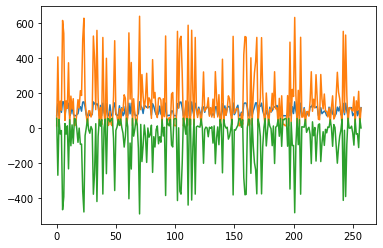

In [161]:
plt.plot(result)
plt.plot(Y_test)
plt.plot(np.subtract(result,Y_test))